In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
women_wear_2018_winter_some_df = pd.read_csv("./women_wear_2018_winter.csv")

In [3]:
import collaborative_filtering


In [4]:
#unique week number in 2018 winter data
women_wear_2018_winter_some_df.week.unique()

array([44, 45, 46, 47, 48, 49, 50, 51, 52], dtype=int64)

In [5]:
women_wear_2018_winter_some_df.head()


# women_wear_2018_winter_some_df = women_wear_2018_winter_some_df[:5000]

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,prod_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-11-01,0769f05e4ff5a70e906cf5bc77d9535ec21c6cef5538ad...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,2018-11-01,0c44061274a6eaeec897b89520eae026f61dba43e16157...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,2018-11-01,0e96235473e2915efbd406190641115aa1bc924e57aa97...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,2018-11-01,13601d393fcaf51faff73621a3569df7f5ed2557f9a27d...,108775015,0.008458,2.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
4,2018-11-01,13601d393fcaf51faff73621a3569df7f5ed2557f9a27d...,108775015,0.008458,2.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [6]:
%%time
avg_percision = []
mean_avg_percision = []
num_users = []
timeline = []

# week 44 - 52
for wk in range(44,52):
    
    cond_train = women_wear_2018_winter_some_df.week <= wk
    X_train = women_wear_2018_winter_some_df.loc[cond_train].reset_index(drop=True)[['customer_id','article_id']]
    cond_test = women_wear_2018_winter_some_df.week == wk + 1
    X_test = women_wear_2018_winter_some_df.loc[cond_test].reset_index(drop=True)[['customer_id','article_id']]
        
    #applying user-based collaborative filtering to get recommended items
    items_recommended = collaborative_filtering.user_based_filter(X_train, 
                                                       similar_user_number = 500, max_items = 5) 

    # calculating average percision for top 10 recommended items
    avg_perp, num_user = collaborative_filtering.average_of_precision(items_recommended, X_test)
    avg_percision.append(avg_perp)

    # calculating mean_avg_percision for top 10 recommended items
    mean_avg_per, num_user = collaborative_filtering.mean_average_precision(items_recommended, X_test)
    mean_avg_percision.append(mean_avg_per)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))
    

 56%|█████▋    | 1979/3508 [00:00<00:00, 10149.08it/s]

Number of users: 89


 10%|▉         | 686/7031 [00:00<00:00, 6854.83it/s]

Number of users: 175


  7%|▋         | 712/10521 [00:00<00:01, 7056.16it/s]

Number of users: 155


  9%|▉         | 1275/13872 [00:00<00:02, 6261.57it/s]

Number of users: 224


  6%|▌         | 965/17249 [00:00<00:01, 9639.51it/s]

Number of users: 310


  8%|▊         | 1750/20591 [00:00<00:02, 8535.66it/s]

Number of users: 379


  6%|▌         | 1386/23782 [00:00<00:03, 6777.79it/s]

Number of users: 392


  2%|▏         | 541/27122 [00:00<00:04, 5403.33it/s]

Number of users: 392


100%|██████████| 27122/27122 [00:04<00:00, 5805.37it/s]

Wall time: 8min 19s


In [7]:
print(avg_percision)
print(mean_avg_percision)
print(num_users)
print(timeline)

[0.03370786516853933, 0.027428571428571438, 0.04129032258064518, 0.02767857142857144, 0.027096774193548393, 0.026385224274406323, 0.03086734693877548, 0.02755102040816326]
[0.03932584269662922, 0.025771428571428574, 0.06019354838709678, 0.03864583333333334, 0.02918279569892472, 0.0328056288478452, 0.035042517006802686, 0.029617346938775508]
[89, 175, 155, 224, 310, 379, 392, 392]
['Wk_45', 'Wk_46', 'Wk_47', 'Wk_48', 'Wk_49', 'Wk_50', 'Wk_51', 'Wk_52']


In [8]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'avg_percision':avg_percision,
                          'mean_avg_percision':mean_avg_percision,
                          'num_users':num_users})

In [9]:
result_df

,timeline,avg_percision,mean_avg_percision,num_users
0,Wk_45,0.033708,0.039326,89
1,Wk_46,0.027429,0.025771,175
2,Wk_47,0.041290,0.060194,155
3,Wk_48,0.027679,0.038646,224
4,Wk_49,0.027097,0.029183,310
5,Wk_50,0.026385,0.032806,379
6,Wk_51,0.030867,0.035043,392
7,Wk_52,0.027551,0.029617,392


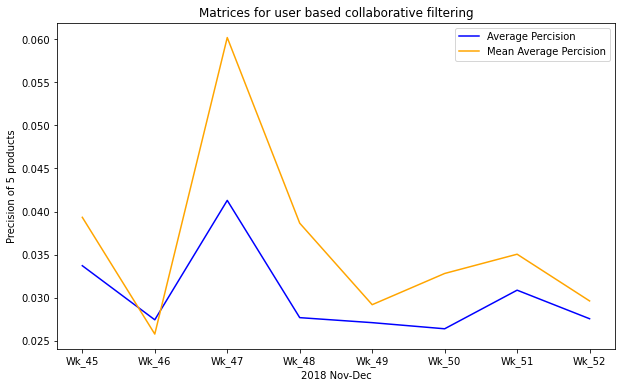

In [10]:
#plot for avg_percision and mean_avg_percision
plt.figure(figsize=(10,6))
plt.plot(result_df.timeline, result_df.avg_percision, color= 'blue')
plt.plot(result_df.timeline, result_df.mean_avg_percision, color= 'orange')
plt.title("Matrices for user based collaborative filtering")
plt.xlabel('2018 Nov-Dec')
plt.ylabel('Precision of 5 products')
plt.legend(['Average Percision','Mean Average Percision'])

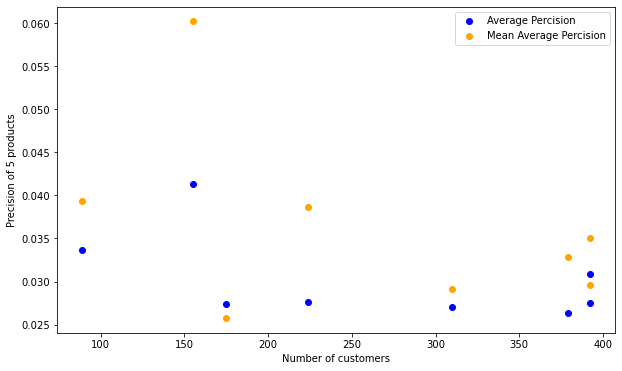

In [11]:
#scatter plot for avg_percision and mean_avg_percision against number of users
plt.figure(figsize=(10,6))
plt.scatter(result_df.num_users, result_df.avg_percision, color = 'blue')
plt.scatter(result_df.num_users, result_df.mean_avg_percision, color = 'orange')
plt.xlabel('Number of customers')
plt.ylabel('Precision of 5 products')
plt.legend(['Average Percision','Mean Average Percision'])